In [105]:
import numpy as np
from numpy import mat,shape,exp,ones
from numpy import *
import pandas as pd
from pandas import DataFrame

In [2]:
def loadDataSet():
    dataMat=[];labelMat=[]
    fr = open('Ch05/testSet.txt')
    for line in fr.readlines():
        lineArr = line.strip().split()
        dataMat.append([1.0,float(lineArr[0]),float(lineArr[1])])
        labelMat.append(int(lineArr[2]))
    return dataMat,labelMat

In [3]:
def sigmoid(inX):
    return 1.0/(1+exp(-inX))

In [4]:
def grandAscent(dataMatIn,classLabels):
    dataMatrix = mat(dataMatIn)
    labelMat = mat(classLabels).transpose()
    m,n = shape(dataMatrix)
    alpha = 0.001
    maxCycles = 500
    weights = ones((n,1))
    for k in range(maxCycles):
        h = sigmoid(dataMatrix*weights)
        error = (labelMat-h)
        weights = weights + alpha*dataMatrix.transpose()*error
    return weights

In [5]:
def gradAscent(datMatIn,classLabels):
    dataMatrix = mat(datMatIn)
    #dataMatrix 未知数
    labelMat = mat(classLabels).transpose()
    m,n = shape(dataMatrix)
    alpha = 0.001
    maxCycles = 500
    weights = ones((n,1))
    # weights  相当于未知数前边的系数

    for k in range(maxCycles):
        h = sigmoid(dataMatrix*weights)
        error = (labelMat-h)
        weights = weights + alpha*dataMatrix.transpose()*error
    return weights

In [29]:
def plotBestFit(weights):
    import matplotlib.pyplot as plt
    dataMat,labelMat = loadDataSet()
    dataArr = array(dataMat)
    n = shape(dataMat)[0]
    xcord1 = [];ycord1 = []
    xcord2 = [];ycord2 = []
    for i in range(n):
        if int(labelMat[i]) == 1:
            xcord1.append(dataArr[i,1]);ycord1.append(dataArr[i,2])
        else:
            xcord2.append(dataArr[i,1]);ycord2.append(dataArr[i,2])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1,ycord1,s=20,c='red',marker='s')
    ax.scatter(xcord2,ycord2,s=20,c='green')
    x = arange(-3.0,3.0,0.1)
    y = (-weights[0]-weights[1]*x)/weights[2]
    ax.plot(x,y)
    plt.xlabel('X1');plt.ylabel('X2');
    plt.show()

In [30]:
dataArr,labelMat = loadDataSet()

In [31]:
weights=gradAscent(dataArr,labelMat)

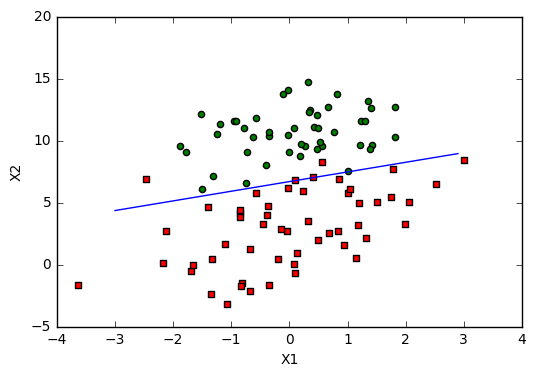

In [32]:
plotBestFit(weights.getA())

In [33]:
def stocGrandAscent0(dataMatrix, classLabels):
    m,n = shape(dataMatrix)
    alpha = 0.01
    weights = ones(n)
    for i in range(m):
        h = sigmoid(sum(dataMatrix[i]*weights))
        error = classLabels[i]-h
        weights = weights +alpha*error*dataMatrix[i]
    return weights


In [35]:
dataArr,labeMat = loadDataSet()
weights=stocGrandAscent0(array(dataArr),labelMat)

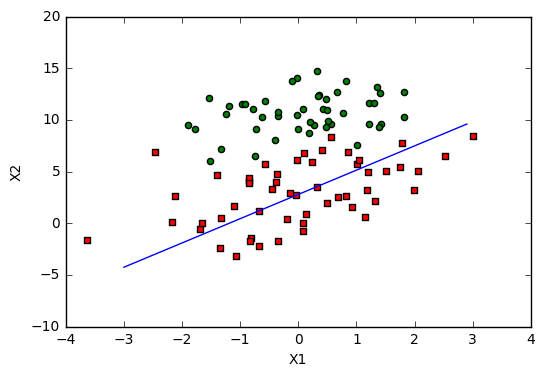

In [36]:
plotBestFit(weights)

In [178]:
def stocGrandAscent1(dataMatrix, classLabels,numIter=150):
    m,n = shape(dataMatrix)
    alpha = 0.01
    weights = ones(n)
    for i in range(numIter):
        dataIndex = list(range(m))
        for j in range(m):
            alpha = 4/(5+j+i) +0.01
            randomIndex = int(random.uniform(0,len(dataIndex)))
            h = sigmoid(sum(dataMatrix[randomIndex]*weights))
            error = classLabels[randomIndex]-h
            weights = weights +alpha*error*dataMatrix[randomIndex]
            dataIndex.pop(randomIndex)
    return weights

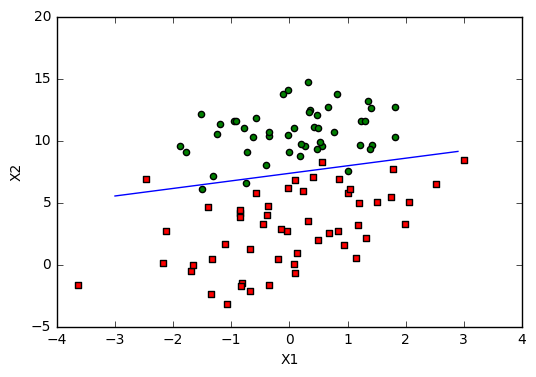

In [179]:
dataArr,labeMat = loadDataSet()
weights=stocGrandAscent1(array(dataArr),labelMat)
plotBestFit(weights)

#  从疝气病症预测病马的死亡率

In [180]:
def classifyVector(inX, weights):
    prob = sigmoid(sum(inX*weights))
    return 1.0 if prob >0.5 else 0.0

In [193]:
def colicTest():
    frTrain = open('Ch05/horseColicTraining.txt')
    frTest = open('Ch05/horseColicTest.txt')
    trainingSet = []; trainingLabels = []
    for line in frTrain.readlines():
        currLine = line.strip('\n').split('\t')
        lineArr = []
        for i in range(21):
            lineArr.append(float(currLine[i]))
        trainingSet.append(lineArr)
        trainingLabels.append(float(currLine[21]))
    trainWeights = stocGrandAscent1(array(trainingSet),trainingLabels,500)
    #print(DataFrame({'A':trainWeights}))
    errorCount = 0; numTestVec = 0.0
    for line in frTest.readlines():
        numTestVec += 1.0
        currLine = line.strip('\n').split('\t')
        lineArr = []
        for i in range(21):
            lineArr.append(float(currLine[i]))
        if int(classifyVector(array(lineArr),trainWeights)) != int(currLine[21]):
            errorCount  += 1
    errorRate = float(errorCount)/numTestVec
    print('the errror rate is :%f'%errorRate)
    return errorRate
def multiTest():
    numtest = 10;errorSum = 0
    for k in range(numtest):
        errorSum += colicTest()
    print('after %d iterations the average error rate is: %f :'%(numtest,errorSum/float(numtest)))

In [194]:
multiTest()

/home/xu/venv/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app


the errror rate is :0.283582
the errror rate is :0.283582
the errror rate is :0.283582
the errror rate is :0.283582
the errror rate is :0.283582
the errror rate is :0.283582
the errror rate is :0.283582
the errror rate is :0.283582
the errror rate is :0.283582
the errror rate is :0.283582
the errror rate is :0.283582
the errror rate is :0.283582
the errror rate is :0.283582
the errror rate is :0.283582
the errror rate is :0.283582
the errror rate is :0.283582
the errror rate is :0.283582
the errror rate is :0.283582
the errror rate is :0.283582
the errror rate is :0.283582
the errror rate is :0.283582
the errror rate is :0.283582
the errror rate is :0.283582
the errror rate is :0.283582
the errror rate is :0.283582
the errror rate is :0.283582
the errror rate is :0.283582
the errror rate is :0.283582
the errror rate is :0.283582
the errror rate is :0.283582
after 30 iterations the average error rate is: 0.283582 :


In [189]:
len(range(21))

21